# Correlación entre contaminantes

Para un análisis exploratorio de los datos, se eligieron 3 estaciones de las 69 disponibles en el catálogo de Aire-Cdmx. Las estaciones en cuestión se encuentran en puntos estratégicos de la ciudad, como el norte (MGH - Miguel Hidaldo, centro (HGM - Hospital General de México) y sur (TLA - Tláhuac) de la misma.

Se calcula la correlacion entre las variables (contaminantes y meteorológicas) de los datos medidos de estas tres estaciones para el año 2018.

El objetivo es encontrar que variables tienen mejor correlación entr4e sí para poder aplicar esto a un modelo predictivo.

In [1]:
# Se importan bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se importa el archivo csv con los datos usando pandas

data_18 = pd.read_csv("merge_cont_2018.csv")

In [3]:
data_18.head()

,Unnamed: 0,date,month,hour,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0,2018-01-01 01:00:00,1,1,AJM,0.8,2.0,25.0,26.0,31.0,53.0,26.0,6.0,53.0,11.6,1.8,258.0,79.0
1,1,2018-01-01 01:00:00,1,1,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2,2018-01-01 01:00:00,1,1,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
3,3,2018-01-01 01:00:00,1,1,SAG,0.6,2.0,21.0,23.0,25.0,80.0,45.0,8.0,36.0,15.2,2.2,10.0,125.0
4,4,2018-01-01 01:00:00,1,1,SFE,0.6,1.0,26.0,28.0,26.0,56.0,22.0,7.0,57.0,11.2,1.3,254.0,79.0


In [4]:
estaciones = ['MGH', 'HGM', 'TLA']
data_18 = data_18[(data_18.id_station.isin(estaciones))]

In [5]:
data_18.head(5)

,Unnamed: 0,date,month,hour,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,1,2018-01-01 01:00:00,1,1,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2,2018-01-01 01:00:00,1,1,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,5,2018-01-01 01:00:00,1,1,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,8,2018-01-01 02:00:00,1,2,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,9,2018-01-01 02:00:00,1,2,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0


In [6]:
del data_18['Unnamed: 0']

In [7]:
del data_18['month']

In [8]:
del data_18['hour']

In [9]:
data_18.head(6)

,date,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,2018-01-01 01:00:00,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2018-01-01 01:00:00,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,2018-01-01 01:00:00,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,2018-01-01 02:00:00,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,2018-01-01 02:00:00,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0
12,2018-01-01 02:00:00,TLA,0.4,2.0,32.0,34.0,14.0,63.0,27.0,11.0,47.0,12.0,3.0,327.0,90.0


In [10]:
est_prom_18 = data_18.groupby('date').mean()

In [11]:
est_prom_18 = est_prom_18.round(1)
est_prom_18.head(10)

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01 00:00:00,0.4,2.5,18.0,20.5,10.5,11.0,8.0,8.0,67.0,9.8,2.6,313.5,18.5
2018-01-01 01:00:00,0.6,1.3,27.3,29.0,17.3,69.7,30.0,9.0,46.3,13.3,2.7,310.3,99.7
2018-01-01 02:00:00,0.4,1.3,25.0,26.3,19.7,67.0,25.3,9.7,47.3,12.6,2.7,308.7,92.3
2018-01-01 03:00:00,0.5,2.3,28.0,29.7,16.7,65.3,27.3,12.7,48.0,12.0,2.9,310.0,93.0
2018-01-01 04:00:00,0.5,7.0,30.3,37.7,12.7,79.7,20.0,29.7,50.0,11.6,2.2,309.0,100.0
2018-01-01 05:00:00,0.5,7.0,32.3,38.3,9.3,78.7,16.7,64.7,54.7,10.7,2.2,319.3,95.7
2018-01-01 06:00:00,0.5,9.7,33.3,43.0,4.7,58.7,12.7,82.3,62.3,9.6,2.4,311.0,71.7
2018-01-01 07:00:00,0.5,12.0,28.7,40.7,7.7,57.0,9.3,53.3,66.3,8.9,2.1,300.7,66.3
2018-01-01 08:00:00,0.5,9.3,25.3,35.0,7.0,57.7,8.7,38.3,66.7,8.7,1.8,310.3,66.7


In [12]:
# Función para hacer el lag

def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [13]:
NON_DER = ['date',]

In [14]:
matriz_total = df_derived_by_shift(est_prom_18, 0, NON_DER)
matriz_total.head(10)

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01 00:00:00,0.4,2.5,18.0,20.5,10.5,11.0,8.0,8.0,67.0,9.8,2.6,313.5,18.5
2018-01-01 01:00:00,0.6,1.3,27.3,29.0,17.3,69.7,30.0,9.0,46.3,13.3,2.7,310.3,99.7
2018-01-01 02:00:00,0.4,1.3,25.0,26.3,19.7,67.0,25.3,9.7,47.3,12.6,2.7,308.7,92.3
2018-01-01 03:00:00,0.5,2.3,28.0,29.7,16.7,65.3,27.3,12.7,48.0,12.0,2.9,310.0,93.0
2018-01-01 04:00:00,0.5,7.0,30.3,37.7,12.7,79.7,20.0,29.7,50.0,11.6,2.2,309.0,100.0
2018-01-01 05:00:00,0.5,7.0,32.3,38.3,9.3,78.7,16.7,64.7,54.7,10.7,2.2,319.3,95.7
2018-01-01 06:00:00,0.5,9.7,33.3,43.0,4.7,58.7,12.7,82.3,62.3,9.6,2.4,311.0,71.7
2018-01-01 07:00:00,0.5,12.0,28.7,40.7,7.7,57.0,9.3,53.3,66.3,8.9,2.1,300.7,66.3
2018-01-01 08:00:00,0.5,9.3,25.3,35.0,7.0,57.7,8.7,38.3,66.7,8.7,1.8,310.3,66.7


In [15]:
matriz_total.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
CO,1.000000,0.784643,0.781138,0.894798,-0.300774,0.439144,0.440885,0.162907,0.078295,-0.350622,-0.443717,-0.187717,0.504750
NO,0.784643,1.000000,0.453919,0.949514,-0.424518,0.146332,0.211562,0.148057,0.216163,-0.454153,-0.409744,-0.081767,0.201851
NO2,0.781138,0.453919,1.000000,0.710333,-0.305253,0.495802,0.445483,0.223523,0.030575,-0.284955,-0.438883,-0.112782,0.542671
NOX,0.894798,0.949514,0.710333,1.000000,-0.442602,0.290259,0.324626,0.195861,0.180321,-0.459007,-0.477801,-0.104079,0.350917
O3,-0.300774,-0.424518,-0.305253,-0.442602,1.000000,0.304662,0.132897,-0.146955,-0.702231,0.798982,0.245831,-0.278063,0.260138
PM2.5,0.439144,0.146332,0.495802,0.290259,0.304662,1.000000,0.515598,0.286160,-0.238770,0.099529,-0.233046,-0.219645,0.895088
PMCO,0.440885,0.211562,0.445483,0.324626,0.132897,0.515598,1.000000,0.222694,-0.420897,0.122886,0.099761,-0.115288,0.843264
SO2,0.162907,0.148057,0.223523,0.195861,-0.146955,0.286160,0.222694,1.000000,0.028553,-0.249807,-0.057813,0.122212,0.295233
RH,0.078295,0.216163,0.030575,0.180321,-0.702231,-0.238770,-0.420897,0.028553,1.000000,-0.700740,-0.243560,0.280997,-0.368545
TMP,-0.350622,-0.454153,-0.284955,-0.459007,0.798982,0.099529,0.122886,-0.249807,-0.700740,1.000000,0.323846,-0.259742,0.126433


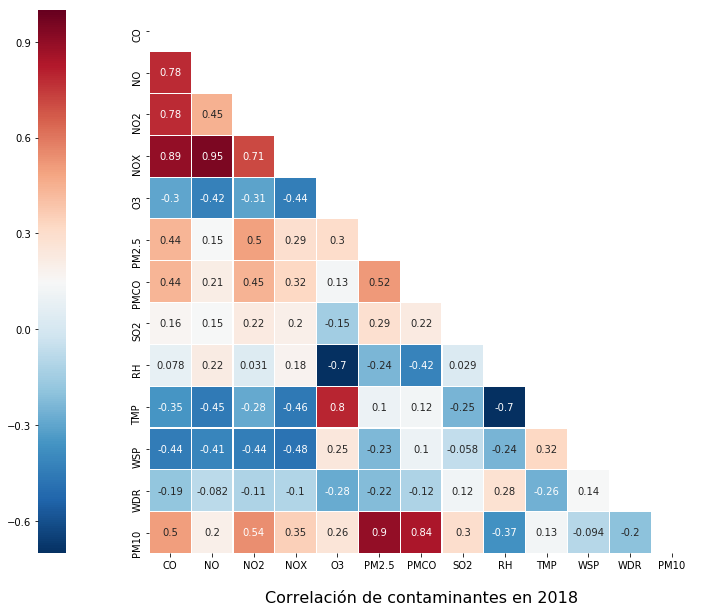

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación de contaminantes en 2018', y=-0.1, size=16)

mask = np.zeros_like(matriz_total.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, cbar_kws = dict(use_gridspec=False,location="left"))

## Cada 12 horas

In [17]:
matriz_total_12 = df_derived_by_shift(est_prom_18, 12, NON_DER)

In [18]:
matriz_total_12 = matriz_total_12[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2', 'RH', 'TMP'
                                  , 'WSP', 'WDR', 'PM10', 'CO_12', 'NO_12', 'NO2_12', 'NOX_12', 'O3_12'
                                   , 'PM2.5_12', 'PMCO_12', 'SO2_12', 'RH_12', 'TMP_12'
                                  , 'WSP_12', 'WDR_12', 'PM10_12']].copy()

In [19]:
matriz_total_12.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,...,NOX_12,O3_12,PM2.5_12,PMCO_12,SO2_12,RH_12,TMP_12,WSP_12,WDR_12,PM10_12
CO,1.000000,0.784643,0.781138,0.894798,-0.300774,0.439144,0.440885,0.162907,0.078295,-0.350622,...,0.155525,-0.081473,0.115695,0.295495,0.133752,-0.103198,-0.105832,0.061453,0.000605,0.226392
NO,0.784643,1.000000,0.453919,0.949514,-0.424518,0.146332,0.211562,0.148057,0.216163,-0.454153,...,-0.054296,0.079967,0.012509,0.227119,0.042080,-0.225072,0.133389,0.251833,-0.004051,0.126058
NO2,0.781138,0.453919,1.000000,0.710333,-0.305253,0.495802,0.445483,0.223523,0.030575,-0.284955,...,0.253923,-0.008578,0.198069,0.309561,0.121621,-0.137798,-0.076761,-0.038458,-0.072636,0.285424
NOX,0.894798,0.949514,0.710333,1.000000,-0.442602,0.290259,0.324626,0.195861,0.180321,-0.459007,...,0.047053,0.060056,0.080197,0.289183,0.076676,-0.227286,0.078150,0.185335,-0.028865,0.200841
O3,-0.300774,-0.424518,-0.305253,-0.442602,1.000000,0.304662,0.132897,-0.146955,-0.702231,0.798982,...,-0.003440,-0.378621,-0.179741,-0.251706,0.045843,0.301136,-0.353716,-0.242664,0.165839,-0.243925
PM2.5,0.439144,0.146332,0.495802,0.290259,0.304662,1.000000,0.515598,0.286160,-0.238770,0.099529,...,0.079699,-0.150439,0.156980,0.149061,0.212526,0.046108,-0.219868,-0.093070,0.085334,0.175884
PMCO,0.440885,0.211562,0.445483,0.324626,0.132897,0.515598,1.000000,0.222694,-0.420897,0.122886,...,0.332726,-0.256695,0.109800,0.350846,0.226301,-0.057389,-0.303418,-0.098595,0.065574,0.251349
SO2,0.162907,0.148057,0.223523,0.195861,-0.146955,0.286160,0.222694,1.000000,0.028553,-0.249807,...,0.031446,0.082415,0.143151,0.234138,0.165643,-0.182380,0.003013,0.090030,-0.013770,0.211320
RH,0.078295,0.216163,0.030575,0.180321,-0.702231,-0.238770,-0.420897,0.028553,1.000000,-0.700740,...,-0.196092,0.330810,0.093981,-0.002185,-0.143120,0.008014,0.347055,0.216000,-0.058510,0.058132
TMP,-0.350622,-0.454153,-0.284955,-0.459007,0.798982,0.099529,0.122886,-0.249807,-0.700740,1.000000,...,0.063077,-0.376773,-0.250244,-0.319107,-0.030241,0.333721,-0.225397,-0.274422,0.106935,-0.323196


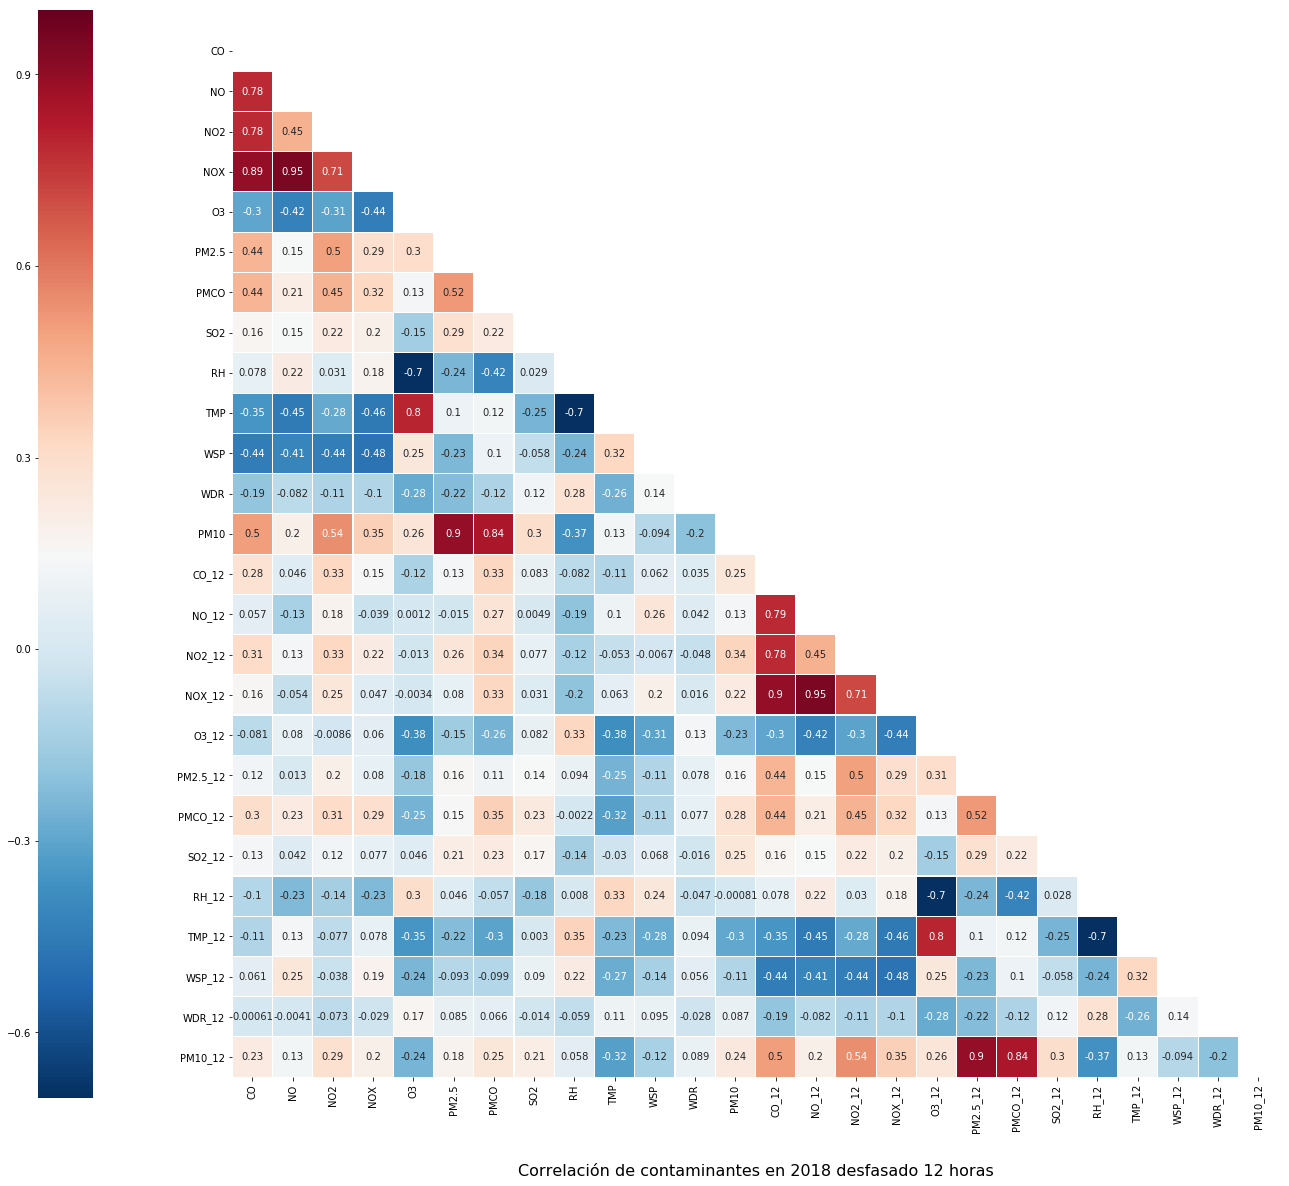

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(25,20))
plt.title(u'Correlación de contaminantes en 2018 desfasado 12 horas', y=-0.1, size=16)

mask = np.zeros_like(matriz_total_12.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total_12.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, cbar_kws = dict(use_gridspec=False,location="left"))

## Cada 24 horas

In [21]:
matriz_total_24 = df_derived_by_shift(est_prom_18, 24, NON_DER)

In [22]:
matriz_total_24 = matriz_total_24[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2', 'RH', 'TMP'
                                  , 'WSP', 'WDR', 'PM10', 'CO_24', 'NO_24', 'NO2_24', 'NOX_24', 'O3_24'
                                   , 'PM2.5_24', 'PMCO_24', 'SO2_24', 'RH_24', 'TMP_24'
                                  , 'WSP_24', 'WDR_24', 'PM10_24']].copy()

In [23]:
matriz_total_24.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,...,NOX_24,O3_24,PM2.5_24,PMCO_24,SO2_24,RH_24,TMP_24,WSP_24,WDR_24,PM10_24
CO,1.000000,0.784643,0.781138,0.894798,-0.300774,0.439144,0.440885,0.162907,0.078295,-0.350622,...,0.517366,-0.285420,0.190145,0.232710,0.194393,0.099862,-0.405572,-0.269112,-0.071443,0.240330
NO,0.784643,1.000000,0.453919,0.949514,-0.424518,0.146332,0.211562,0.148057,0.216163,-0.454153,...,0.509983,-0.381566,0.035738,0.030116,0.141130,0.263981,-0.481383,-0.287705,0.014111,0.038168
NO2,0.781138,0.453919,1.000000,0.710333,-0.305253,0.495802,0.445483,0.223523,0.030575,-0.284955,...,0.394223,-0.263850,0.174572,0.233702,0.187745,0.036551,-0.324306,-0.225179,-0.061265,0.231111
NOX,0.894798,0.949514,0.710333,1.000000,-0.442602,0.290259,0.324626,0.195861,0.180321,-0.459007,...,0.541919,-0.394159,0.090256,0.106800,0.177900,0.220307,-0.494481,-0.306534,-0.010428,0.112254
O3,-0.300774,-0.424518,-0.305253,-0.442602,1.000000,0.304662,0.132897,-0.146955,-0.702231,0.798982,...,-0.259399,0.763459,0.293320,0.166288,-0.104903,-0.593731,0.661962,0.152835,-0.285103,0.270517
PM2.5,0.439144,0.146332,0.495802,0.290259,0.304662,1.000000,0.515598,0.286160,-0.238770,0.099529,...,0.233271,0.173418,0.414308,0.312520,0.175713,-0.227480,0.011561,-0.204050,-0.217115,0.422378
PMCO,0.440885,0.211562,0.445483,0.324626,0.132897,0.515598,1.000000,0.222694,-0.420897,0.122886,...,0.234020,0.114315,0.276418,0.544822,0.170943,-0.371816,0.052282,0.022127,-0.137798,0.456807
SO2,0.162907,0.148057,0.223523,0.195861,-0.146955,0.286160,0.222694,1.000000,0.028553,-0.249807,...,0.140644,-0.138339,0.062918,0.128660,0.283552,0.007378,-0.217028,-0.043300,0.060800,0.106439
RH,0.078295,0.216163,0.030575,0.180321,-0.702231,-0.238770,-0.420897,0.028553,1.000000,-0.700740,...,0.083925,-0.578596,-0.288962,-0.383394,-0.033621,0.747934,-0.513769,-0.177016,0.265951,-0.380745
TMP,-0.350622,-0.454153,-0.284955,-0.459007,0.798982,0.099529,0.122886,-0.249807,-0.700740,1.000000,...,-0.334280,0.692483,0.128019,0.109390,-0.195899,-0.562108,0.820917,0.236736,-0.260835,0.137276


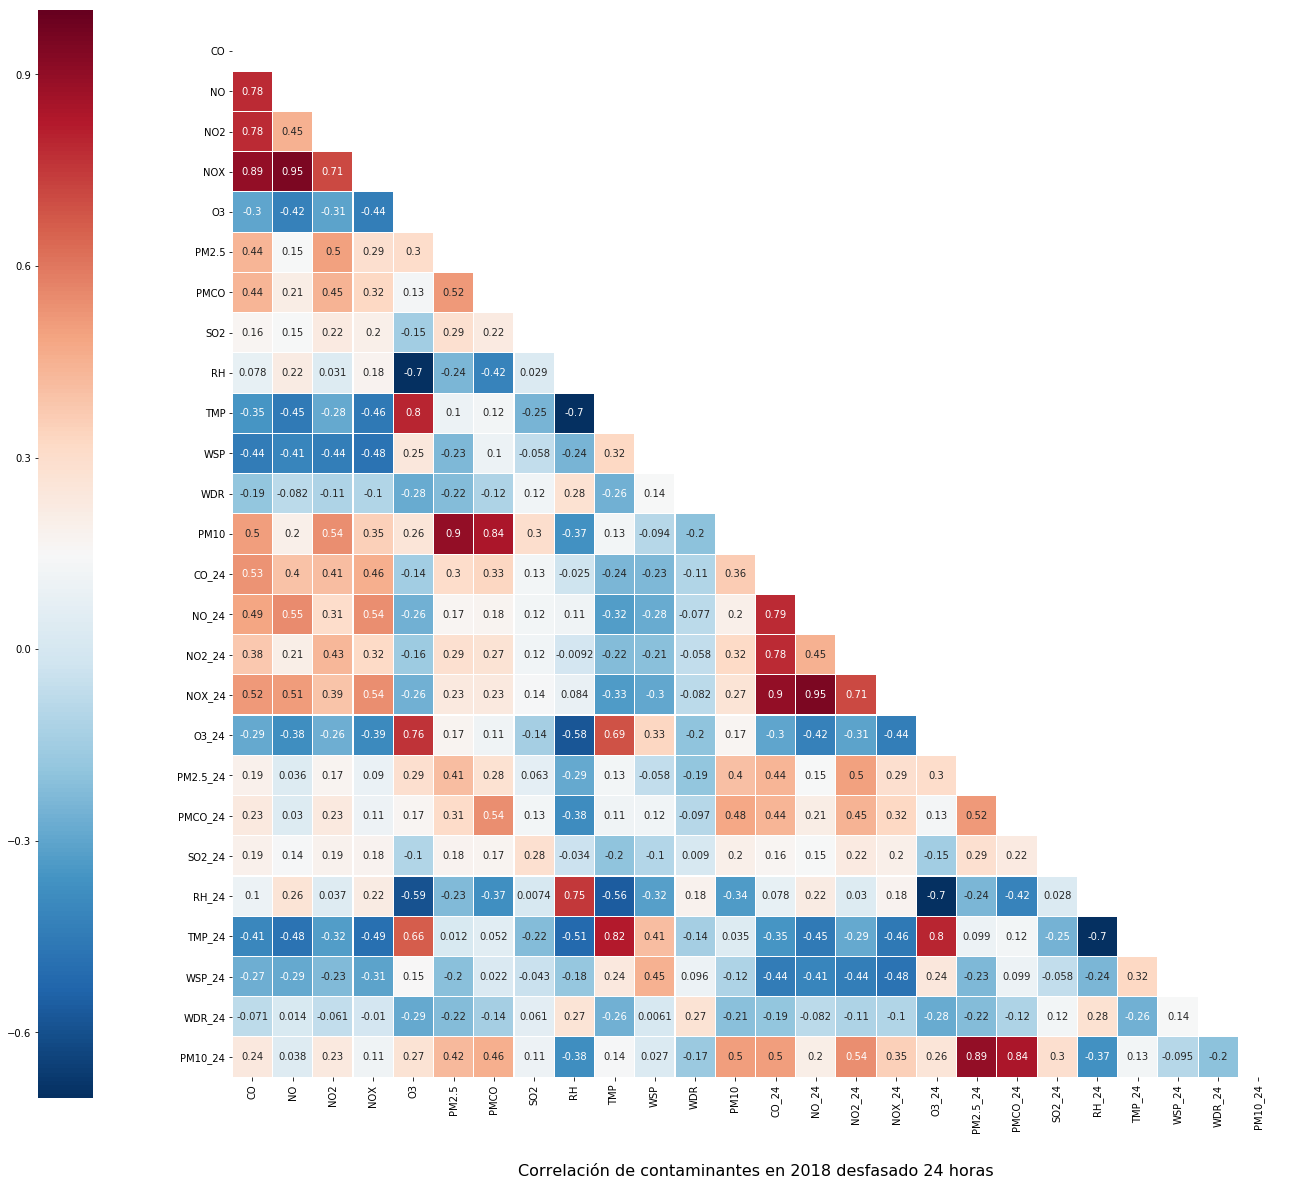

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(25,20))
plt.title(u'Correlación de contaminantes en 2018 desfasado 24 horas', y=-0.1, size=16)

mask = np.zeros_like(matriz_total_24.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total_24.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, cbar_kws = dict(use_gridspec=False,location="left"))

## Cada 48 horas

In [25]:
matriz_total_48 = df_derived_by_shift(est_prom_18, 48, NON_DER)

In [26]:
matriz_total_48 = matriz_total_48[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM2.5', 'PMCO', 'SO2', 'RH', 'TMP'
                                  , 'WSP', 'WDR', 'PM10', 'CO_48', 'NO_48', 'NO2_48', 'NOX_48', 'O3_48'
                                   , 'PM2.5_48', 'PMCO_48', 'SO2_48', 'RH_48', 'TMP_48'
                                  , 'WSP_48', 'WDR_48', 'PM10_48']].copy()

In [27]:
matriz_total_48.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,...,NOX_48,O3_48,PM2.5_48,PMCO_48,SO2_48,RH_48,TMP_48,WSP_48,WDR_48,PM10_48
CO,1.000000,0.784643,0.781138,0.894798,-0.300774,0.439144,0.440885,0.162907,0.078295,-0.350622,...,0.383342,-0.277170,0.114934,0.146029,0.168600,0.118049,-0.404367,-0.216852,-0.009232,0.148119
NO,0.784643,1.000000,0.453919,0.949514,-0.424518,0.146332,0.211562,0.148057,0.216163,-0.454153,...,0.336350,-0.355047,0.004437,-0.031132,0.138434,0.265301,-0.454844,-0.244877,0.049969,-0.013295
NO2,0.781138,0.453919,1.000000,0.710333,-0.305253,0.495802,0.445483,0.223523,0.030575,-0.284955,...,0.277769,-0.233484,0.091044,0.135280,0.146559,0.049449,-0.309496,-0.164740,-0.009825,0.127624
NOX,0.894798,0.949514,0.710333,1.000000,-0.442602,0.290259,0.324626,0.195861,0.180321,-0.459007,...,0.363751,-0.362472,0.036053,0.023915,0.161163,0.225949,-0.468177,-0.251317,0.035762,0.035191
O3,-0.300774,-0.424518,-0.305253,-0.442602,1.000000,0.304662,0.132897,-0.146955,-0.702231,0.798982,...,-0.137970,0.585545,0.255372,0.164655,-0.082528,-0.477560,0.519783,0.095467,-0.250609,0.245556
PM2.5,0.439144,0.146332,0.495802,0.290259,0.304662,1.000000,0.515598,0.286160,-0.238770,0.099529,...,0.230493,0.067556,0.264286,0.209918,0.082484,-0.160910,-0.058213,-0.189856,-0.166065,0.274883
PMCO,0.440885,0.211562,0.445483,0.324626,0.132897,0.515598,1.000000,0.222694,-0.420897,0.122886,...,0.186386,0.078346,0.217584,0.388235,0.157976,-0.306595,-0.005501,-0.000821,-0.113525,0.338546
SO2,0.162907,0.148057,0.223523,0.195861,-0.146955,0.286160,0.222694,1.000000,0.028553,-0.249807,...,0.131146,-0.130628,0.032113,0.086717,0.108738,-0.008234,-0.170341,-0.067725,0.023416,0.065241
RH,0.078295,0.216163,0.030575,0.180321,-0.702231,-0.238770,-0.420897,0.028553,1.000000,-0.700740,...,0.005250,-0.468573,-0.306440,-0.368929,-0.076071,0.609278,-0.390016,-0.130833,0.232380,-0.383891
TMP,-0.350622,-0.454153,-0.284955,-0.459007,0.798982,0.099529,0.122886,-0.249807,-0.700740,1.000000,...,-0.238648,0.578225,0.129223,0.095189,-0.158691,-0.450546,0.676838,0.190785,-0.230070,0.130388


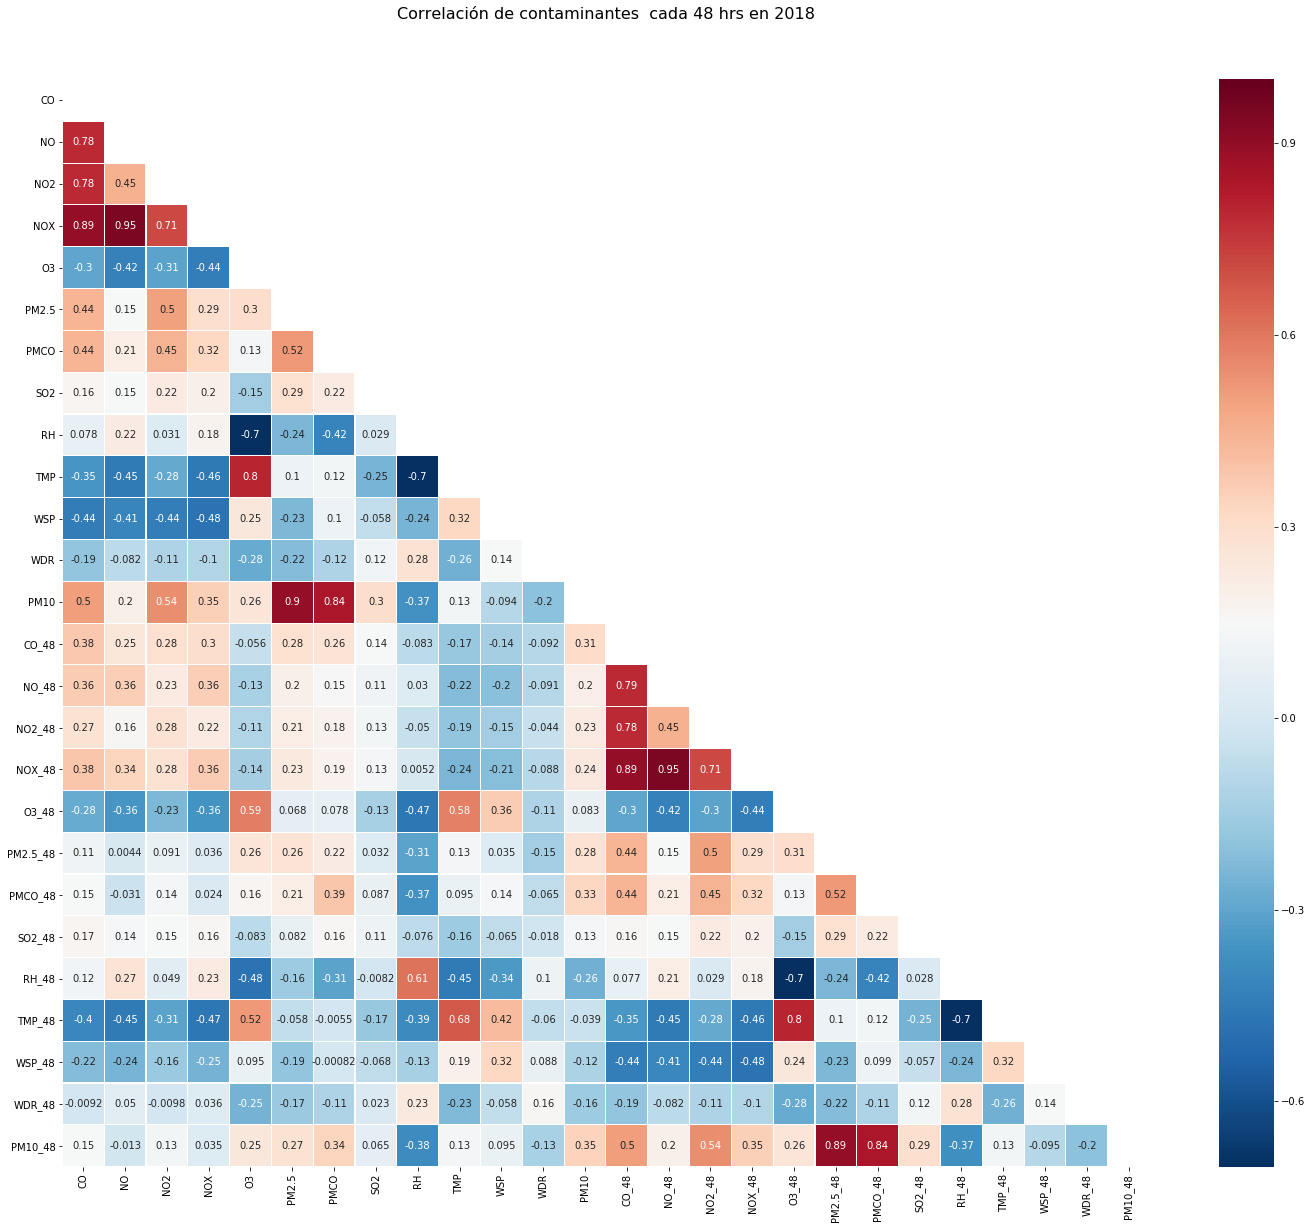

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(25,20))
plt.title(u'Correlación de contaminantes  cada 48 hrs en 2018', y=1.05, size=16)

mask = np.zeros_like(matriz_total_48.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total_48.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)